###  auto_mpg에 들어있는 컬럼에 따른 mpg 예측
- 데이터셋 : auto_mpg.csv
- 학습종류 : 지도학습 / 
- 알고리즘 : knn
- 피쳐 : weight
- 타겟:  mpg

[1] 모듈 로딩 및 데이터 준비

In [2]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

In [3]:
mpgDF = pd.DataFrame(pd.read_csv('../data/auto_mpg.csv'))
mpgDF['horsepower'] = mpgDF['horsepower'].replace('?', 'nan')
mpgDF = mpgDF.ffill()


In [4]:
mpgDF['horsepower'] = mpgDF['horsepower'].astype(float)
mpgDF = mpgDF.ffill()
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

mpg와 연관성 있는 데이터.
- cylinder, displacement, horsepower, weight
- 정규화도 필요

In [5]:
# feature = mpgDF[['cylinders', 'displacement','horsepower','weight']]
# 실린더제외
feature = mpgDF[['weight']]
target = mpgDF['mpg']

[2] 데이터분석 -탐색적 분석

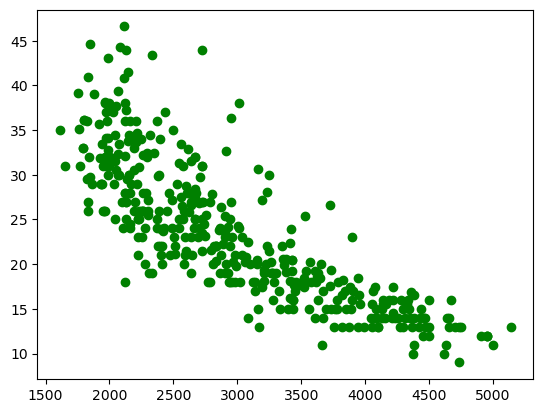

In [6]:
## 무게와 길이의 분포
plt.plot(feature, target,'og')
plt.show()

- 탐색적 데이터 분석 결과
    - 데이터 분포 분석: 길이에 따른 무게가 증가하는 양상 보임
    - 주의 


[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [7]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [8]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (303, 1) / X_test => 2D, (101, 1)
y_train => 1D (303,) / y_test => 2D, (101,)


In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error

[4] 학습 진행

In [10]:
## [4-1] 알고리즘 객체 생성
model = KNeighborsRegressor(n_neighbors=5)

In [11]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
print(model.n_features_in_)
print(model.n_samples_fit_)
# print(model.feature_names_in_)
print(model.effective_metric_)
#거리 재는 방법

1
303
euclidean


In [13]:
X_train.index[:3]

Index([89, 191, 222], dtype='int64')

In [14]:
## 4-3 훈련데이터 셋으로 예측 -=> predict(2d)
## - 무게에 대한 mpg 예측 결과
pre_weight = model.predict(X_train)
pre_weight

array([16.28, 22.2 , 15.4 , 32.06, 24.32, 25.72, 22.36, 32.5 , 15.48,
       19.62, 14.98, 19.56, 13.4 , 26.94, 19.12, 27.44, 26.68, 32.96,
       18.2 , 15.14, 16.14, 18.02, 23.76, 15.3 , 32.9 , 12.98, 22.64,
       16.92, 24.58, 28.3 , 12.98, 24.92, 19.7 , 24.58, 15.2 , 25.  ,
       21.66, 29.  , 21.66, 26.74, 27.4 , 22.2 , 13.8 , 28.56, 12.8 ,
       31.52, 30.82, 25.  , 34.96, 15.9 , 17.76, 23.76, 12.8 , 25.36,
       26.44, 16.14, 13.6 , 13.6 , 16.92, 31.26, 29.7 , 15.4 , 26.6 ,
       24.32, 29.  , 33.24, 29.02, 26.68, 18.02, 15.2 , 12.8 , 22.44,
       33.8 , 14.7 , 18.2 , 23.  , 15.7 , 15.7 , 29.  , 31.26, 21.68,
       29.  , 17.1 , 12.2 , 30.68, 26.2 , 17.1 , 32.34, 19.18, 13.  ,
       30.48, 32.96, 15.7 , 19.12, 31.1 , 16.9 , 33.22, 33.52, 33.12,
       13.4 , 19.12, 32.58, 19.62, 32.9 , 21.42, 14.3 , 18.  , 20.66,
       22.12, 14.4 , 32.74, 31.64, 30.48, 14.7 , 14.9 , 31.64, 21.5 ,
       21.66, 15.48, 28.28, 18.9 , 27.48, 28.28, 15.  , 27.48, 16.1 ,
       31.4 , 23.44,

In [15]:
## 모듈화
r_dict = {x:[] for x in ['score', 'rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = model.score(x, y)
    pre_y = model.predict(x)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.7637625872704601, 0.6325936729180314],
 'rmse': [3.673009934671838, 5.069173385462485],
 'mse': [13.49100198019802, 25.69651881188119],
 'mae': [2.6349834983498353, 3.5479207920792084]}

In [16]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,rmse,mse,mae
train,0.7638,3.6730,13.4910,2.6350
test,0.6326,5.0692,25.6965,3.5479
diff,0.1312,1.3962,12.2055,0.9129


[5]최근접이웃 알고리즘의 동작원리 확인
- k개만큼 가까이 있는 데이터를 추출
- 회귀


In [17]:
#데이터 지정
X_train.head()

,weight
89,3777.0
191,3233.0
222,4060.0
18,2130.0
24,2648.0


In [18]:
y_train.head()

89     15.0
191    22.0
222    17.0
18     27.0
24     21.0
Name: mpg, dtype: float64

In [19]:
## 인덱스 리셋
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (303, 1) / X_test => 2D, (101, 1)
y_train => 1D (303,) / y_test => 2D, (101,)


In [20]:
#데이터지정
X_train.iloc[0], y_train[0]

(weight    3777.0
 Name: 0, dtype: float64,
 np.float64(15.0))

In [21]:
feature.mean()

weight    2966.618812
dtype: float64

In [22]:
model.kneighbors()

(array([[ 4.,  8., 22., 42., 43.],
        [ 3., 12., 12., 23., 28.],
        [ 6., 20., 36., 38., 40.],
        ...,
        [ 7., 22., 22., 26., 55.],
        [ 5.,  7.,  9., 17., 20.],
        [ 5.,  5.,  9., 10., 10.]]),
 array([[ 92,  77, 159,   8,  20],
        [ 41, 108, 218, 157, 221],
        [ 61, 238, 274, 298, 105],
        ...,
        [262, 292, 125, 134, 203],
        [250,  35, 167,  75, 263],
        [ 97, 146,  13, 101, 248]]))

In [33]:
distance, indices = model.kneighbors([[3000]])
distance, indices


c:\Users\kdt\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


(array([[55., 67., 90., 95., 96.]]), array([[60, 99, 26, 45, 46]]))

In [24]:
indices = indices.reshape(-1)

In [25]:
y_train[indices]

202    24.3
104    19.8
161    24.0
220    38.0
107    18.0
Name: mpg, dtype: float64

In [26]:
y_train[indices].index.tolist()
idx = y_train[indices].index.tolist()
idx

[202, 104, 161, 220, 107]

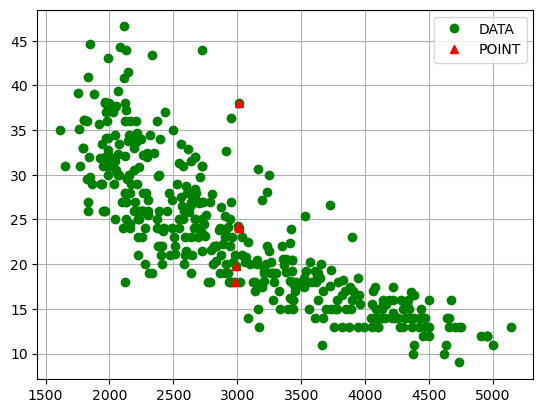

In [27]:
## 무게와 길이의 분포
plt.plot(feature, target,'og', label = 'DATA')
# plt.plot(X_train.iloc[0], y_train[0], '^b', label = 'POINT')
plt.plot(X_train.iloc[idx], y_train[indices], '^r', label = 'POINT')

plt.legend()
plt.grid()
plt.show()

In [28]:
pre_mpg = y_train[indices].mean()

print(f" 무게 3000 mpg {pre_mpg}로 예측")


 무게 3000 mpg 24.82로 예측


[6] 최적의 K 찾기 <hr>
- 최근접 이웃 갯수 => k
- 기본값 : 5
- 나의 데이터에 최적인 K 찾기
    * 1~ 전체 데이터 수만큼 K값 변견한 KNR 인스턴스 생성
    * 학습, 예측, 성능평가, 비용계산 결과 비교
    * 성능평가 높고, 비용계산 낮은 K 결정.




In [29]:
# 데이터 개수
train_data = X_train
train_label = y_train
DATANUMS = train_data.shape[0]

#k 갯수에 따른 모델 성능과 비용함수값 저장
HISTORY = [[],[]] # [score_list, rmse_list]
HISTORY = {'score':[], 'rmse':[]}

# k 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, DATANUMS+1):
    #KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)
    
    #KNR 학습 및 예측
    model.fit(train_data, train_label)
    pre_ = model.predict(train_data)
    
    #KNR 성능평가 및 비용계산
    score = model.score(train_data, train_label)
    rmse = root_mean_squared_error(train_label, pre_)
    #저장
    HISTORY['score'].append(score)
    HISTORY['rmse'].append(rmse)
    
    
print(HISTORY)

{'score': [0.8895049261004822, 0.8228907235597742, 0.7945778429769519, 0.7764142319112346, 0.7637625872704601, 0.7571971832713232, 0.7497360884477055, 0.7409239590457102, 0.732668416308665, 0.7238033643529123, 0.7212889872670281, 0.722205640585255, 0.7184508150809106, 0.7181301778081501, 0.718206171293321, 0.7213459199743841, 0.7194974163942186, 0.7195911449526196, 0.7224141333967917, 0.7206060883676921, 0.7195899577500724, 0.7205985434138142, 0.7204065196390947, 0.7203345676502655, 0.7206098075792782, 0.7198224759470983, 0.7186117380071676, 0.7193843754864786, 0.7193136335772361, 0.7203215879836381, 0.719090575169414, 0.717422697715735, 0.7175324026474568, 0.7167902283096124, 0.717060246306005, 0.715333847011498, 0.7142813779277428, 0.7134587090986095, 0.7116041128782984, 0.7118485781307791, 0.7118627101236122, 0.7105452902, 0.711097038498332, 0.7112516196761838, 0.7103235314342516, 0.7110962297049801, 0.7109658447117211, 0.7115532250276608, 0.7103016942949243, 0.7091077561215204, 0.7

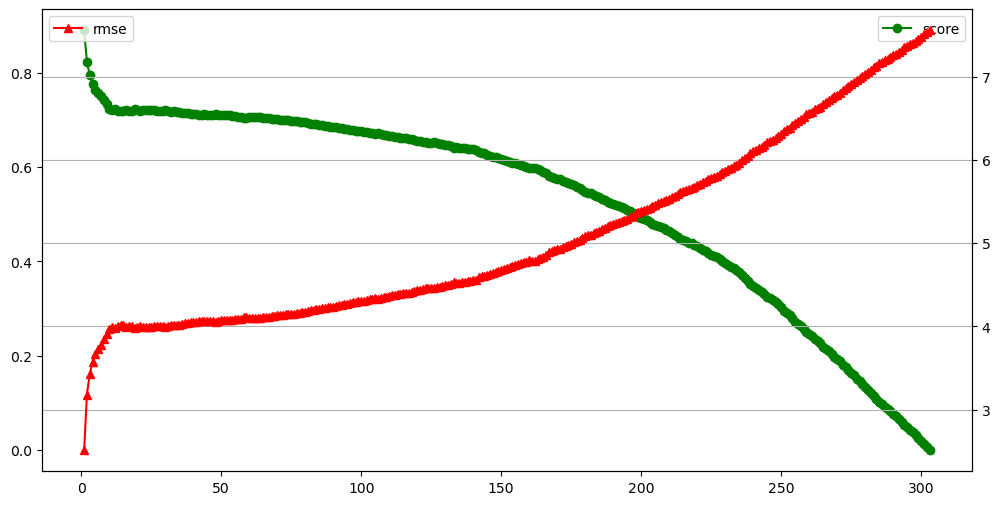

In [30]:
## 무게와 길이의 분포
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(range(1, DATANUMS+1), HISTORY['score'],'og-', label = 'score')
# for i in range(1, DATANUMS+1):
#     ax.text(i, HISTORY['score'][i-1], str(i))
# score 0~1 1이 이상적
ax2 = plt.twinx(ax)
ax2.plot(range(1, DATANUMS+1), HISTORY['rmse'],'^r-', label = 'rmse')
# for i in range(1, DATANUMS+1):
#     ax2.text(i, HISTORY['rmse'][i-1], str(i))
    

# rmse 0~1 0이 이상적
# plt.xlabel('k')
# plt.ylabel('rmse')
ax.legend()
ax2.legend()
plt.grid()
plt.show()

1~10 구간이 가장 좋음.
--> 데이터 수가 적어서 나타나는 현상.

In [31]:
print('SCORE', min(HISTORY['score']), max(HISTORY['score']))
print('RMSE', min(HISTORY['rmse']), max(HISTORY['rmse']))

SCORE 0.0 0.8895049261004822
RMSE 2.511997614091486 7.5569711498399785


In [32]:
#테스트 데이터 투입

test_data =  X_test
test_label = y_test
    #KNR 인스턴스 생성
model = KNeighborsRegressor(n_neighbors=5)

#KNR 학습 및 예측
model.fit(test_data, test_label)
pre_ = model.predict(test_data)

#KNR 성능평가 및 비용계산
score = model.score(test_data, test_label)
rmse = root_mean_squared_error(test_label, pre_)

print(score, rmse)

0.7448669775043715 4.224226216564741


## 목표 테스트 데이터에 잘 맞는 k값 찾기

ㅓ